In [1]:
#Импорт библиотек
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random

In [2]:
#вычисление дистанции до центров
def distance(pixel, center):
    f = (pixel - center)**2
    f[0] = 30*f[0]
    f[1] = 59*f[1]
    f[2] = 11*f[2]
    res = f[0]//2 + f[1]//2 + f[2]//2
    return res*2

In [3]:
def center(Sum, am):
    if(am == 0):
        f = Sum
    else:
        f = Sum
        f[0] = f[0]/am
        f[1] = f[1]/am
        f[2] = f[2]/am
    return f

In [4]:
#Импорт исходного изображения
img = cv.imread('Gorshok.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
original_shape = img.shape

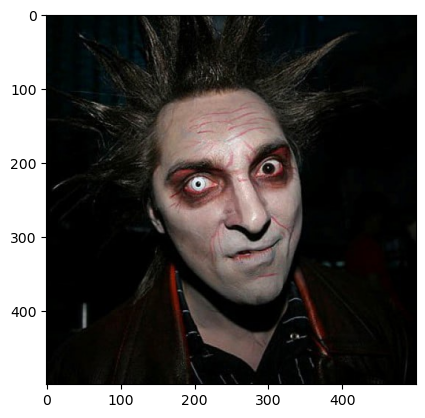

(500, 500, 3)

In [5]:
plt.imshow(img)
plt.show()
img.shape

In [6]:
#Преобразование в одномерный массив для удобства работы
all_pixels  = img.reshape((-1,3))
all_pixels.shape

(250000, 3)

In [7]:
#Выбор изначальных центров кластеров
clusters = 100
centers = [[0]*3]*clusters
for i in range(clusters):
    centers[i] = random.randrange(0, all_pixels.shape[0])

In [8]:
#Проверка на совпадение центров кластеров
for i in range(clusters):
    for j in range(clusters - 1):
        if(centers[i] == centers[j + 1]):
            centers[j + 1] = random.randrange(0, all_pixels.shape[0])

In [9]:
#Назначение центров
for i in range(clusters):
    centers[i] = all_pixels[centers[i]]
centers

[array([0, 0, 0], dtype=uint8),
 array([159, 152, 146], dtype=uint8),
 array([9, 9, 7], dtype=uint8),
 array([1, 1, 0], dtype=uint8),
 array([179, 168, 166], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([145, 119, 120], dtype=uint8),
 array([102,  97,  93], dtype=uint8),
 array([167, 129, 126], dtype=uint8),
 array([22, 24, 11], dtype=uint8),
 array([0, 3, 4], dtype=uint8),
 array([21, 20, 15], dtype=uint8),
 array([159, 134, 129], dtype=uint8),
 array([35, 37, 32], dtype=uint8),
 array([123,  93,  91], dtype=uint8),
 array([19, 22, 15], dtype=uint8),
 array([155, 127, 113], dtype=uint8),
 array([0, 1, 3], dtype=uint8),
 array([2, 4, 1], dtype=uint8),
 array([0, 0, 0], dtype=uint8),
 array([4, 4, 2], dtype=uint8),
 array([163, 143, 132], dtype=uint8),
 array([2, 6, 5], dtype=uint8),
 array([1, 2, 6], dtype=uint8),
 array([76, 67, 62], dtype=uint8),
 array([153, 125, 121], dtype=uint8),
 array([13, 18, 14], dtype=uint8),
 array([1, 1, 1], dtype=uint8),
 array([0, 0, 0], dtype=ui

In [10]:
#Переменная для проверки расположения пикселей относительно центров
fil = np.zeros(all_pixels.shape[0])
fil

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
#Проверка расположения пикселей относительно центров
for i in range(all_pixels.shape[0]):
    d = np.zeros(clusters)
    for j in range(clusters):
        d[j] = distance(all_pixels[i],centers[j])
    fil[i] = np.nanargmin(d)

In [12]:
Sum = [[0]*3]*clusters
amo = [0]*clusters
for i in range(all_pixels.shape[0]):
    Sum[int(fil[i])] += all_pixels[i]
    amo[int(fil[i])] += 1

In [13]:
for i in range(len(Sum)):
    centers[i] = center(Sum[i], amo[i])

In [14]:
len(centers)

100

In [15]:
#Переменная для записи нового изображения
new_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
new_img.shape

(250000, 3)

In [16]:
#Перезапись нового изображения
for i in range(all_pixels.shape[0]):
    new_img[i] = centers[int(fil[i])]

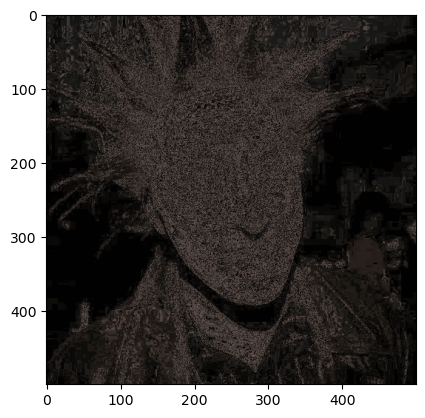

(500, 500, 3)

In [17]:
new_img = new_img.reshape(original_shape)
plt.imshow(new_img)
plt.show()
img.shape

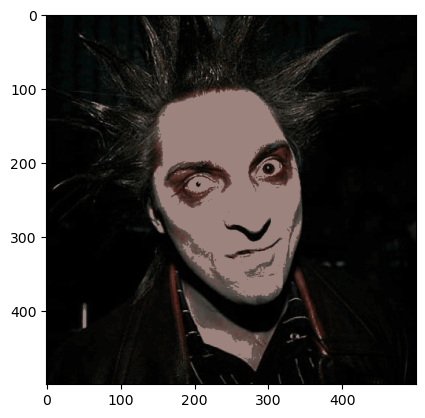

(500, 500, 3)

In [18]:
#Полный цикл обработки методом k-means
old_centers = []
while (old_centers != centers):
    old_centers = centers 
    for i in range(all_pixels.shape[0]):
        d = np.zeros(clusters)
        for j in range(clusters):
            d[j] = distance(all_pixels[i],centers[j])
        fil[i] = np.nanargmin(d)
    
    Sum = [[0]*3]*clusters
    amo = [0]*clusters
    for i in range(all_pixels.shape[0]):
        Sum[int(fil[i])] += all_pixels[i]
        amo[int(fil[i])] += 1
        
    for i in range(len(Sum)):
        centers[i] = center(Sum[i], amo[i])
            
    new_img = np.zeros((img.shape[0]*img.shape[1],3),dtype='uint8')
    for i in range(all_pixels.shape[0]):
        new_img[i] = centers[int(fil[i])]
    
new_img = new_img.reshape(original_shape)
plt.imshow(new_img)
plt.show()
img.shape